# Import des librairies

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from unidecode import unidecode
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict



# Import du document

In [63]:
document = ["""
# The 2023 US National Seismic Hazard Model: Ground-motion characterization for the conterminous United States
## Morgan P Moschetti, M.EERI ${ }^{1}$ (D) Brad T Aagaard ${ }^{1}$, Sean K Ahdi, M.EERI ${ }^{1,2}$ (D), Jason Altekruse ${ }^{1}$ (D), Oliver S Boyd ${ }^{1}$ (D), Arthur D Frankel, M.EERI ${ }^{3}$, Julie Herrick ${ }^{1}$ (D), Mark D Petersen, M.EERI ${ }^{1}$ (D), Peter M Powers ${ }^{1}$ (D), Sanaz Rezaeian ${ }^{1}$ (D), Allison M Shumway ${ }^{1}$ (D), James A Smith ${ }^{1}$ (D), William J Stephenson ${ }^{1}$, Eric M Thompson ${ }^{1}$ (D), and Kyle B Withers ${ }^{1}$ (D)
### Abstract
We update the ground-motion characterization for the 2023 National Seismic Hazard Model (NSHM) for the conterminous United States. The update includes the use of new ground-motion models (GMMs) in the Cascadia subduction zone; an adjustment to the central and eastern United States (CEUS) GMMs to reduce misfits with observed data; an updated boundary for the application of GMMs for shallow, crustal earthquakes in active tectonic regions (i.e. western United States (WUS)) and stable continental regions (i.e. CEUS); and the use of improved models for the site response of deep sedimentary basins in the WUS and CEUS. Site response updates include basin models for the California Great Valley and for the Portland and Tualatin basins, Oregon, as well as long-period basin effects from three-dimensional simulations in the Greater Los Angeles region and in the Seattle basin; in the CEUS, we introduce a broadband (0.01- to 10-s period) amplification model for the effects of the passive-margin basins of the Atlantic and Gulf Coastal Plains. In addition, we summarize progress on implementing rupture directivity models into seismic hazard models, although they are not incorporated in the 2023 NSHM. We implement the ground-motion characterization for the 2023 NSHM in the US Geological Survey's code for probabilistic seismic hazard analysis, nshmp-haz-v2, and present the sensitivity of hazard to these changes.
### Keywords
Conterminous United States, earthquake ground motion, PSHA, seismic hazard
### Introduction
Ground-motion characterization (GMC) for probabilistic seismic hazard analysis (PSHA) consists of specifying the probability distributions of ground-motion intensities that result from all seismic sources in an earthquake rupture forecast (ERF). An important part of the development of the GMC is accounting for uncertainties. Modern PSHA distinguishes between epistemic uncertainty, which relates to a lack of knowledge and may be reduced through better understanding (and models), and aleatory variability, which arises due to the intrinsic randomness of processes and unmodeled effects (Baker et al., 2021). For the GMC for the US National Seismic Hazard Model (NSHM-GMC), epistemic uncertainty has previously been modeled through a logic-tree framework with branches associated with different ground-motion models (GMMs). Aleatory variability in the GMMs, which assumes a log-normal distribution, accounts for the unmodeled and random features of earthquake ground motion.
The NSHM-GMC consists of (1) selecting appropriate GMMs for all earthquake scenarios and sites, modifying GMMs as necessary, and combining GMMs in logic trees; and (2) specifying site parameters for the effects of sedimentary basins and implementing and developing appropriate amplification functions. We distinguish between western United States (WUS) basins, which are typically structurally bounded or associated with a convergent plate boundary, and the unbounded, dipping sedimentary wedges in the passive margin of the central and eastern United States (CEUS). Although the 2023 NSHM is a 50-state update, the updates described here relate to the conterminous United States. The GMC for the Hawaii and Alaska seismic hazard models is described by Petersen et al. (2022, 2023). Petersen et al. (2023) and Rezaeian et al. (2023) provide further discussion of logic-tree weights for the NSHM-GMC for the conterminous United States and for implementation of Next Generation Attenuation (NGA)-subduction GMMs (Bozorgnia et al., 2022) in Cascadia, respectively. Petersen et al. (2023) present comparisons of the 2018 and 2023 NSHMs.
The NSHM provides time-independent seismic hazard maps for uniform $V_{S 30}$ site conditions- $V_{S 30}=150,185,260,365,530,760,1080,1500 \mathrm{~m} / \mathrm{s}$. Although site conditions exhibit significant spatial variation, and uniform $V_{S 30}$ values do not reflect expected conditions, the production of maps with uniform $V_{S 30}$ values is a long-standing decision that allows users to select $V_{S 30}$ for their sites of interest. This choice of map output recognizes that $V_{S 30}$ varies at spatial scales less than the resolution of the hazard maps and permits users to employ local information. However, since 2018 the NSHM has included the amplifying effects of deep sedimentary basins on long-period ( $T>1 \mathrm{~s}$ ) ground motions in the WUS, and the NSHM-GMC, therefore, requires the specification of basin-depth parameters for sites in multiple regions.
For the first time, we formed a NSHM Ground-Motion Review Panel to review and provide feedback on model selection and choices for the NSHM-GMC for the 2023 update. The panel was formed at the end of 2022 and comprised eight members with expertise in seismic hazard and risk, ground-motion modeling, and site response. The Review Panel made numerous recommendations that were summarized in a report to the United States Geological Survey (USGS) (Stewart et al., 2023) and have informed the NSHM-GMC updates. Other recommendations were identified as being appropriate for longer-term efforts (i.e. not for incorporation in 2023 NSHM). In October 2023, the USGS also convened a "Tiger team" to discuss issues for the Alaska-NSHM; this group also reviewed the details of the NGA-East adjustment factors and provided support for the incorporation of this model. Details are provided in the work by Petersen et al. (2023).
The purpose of this article is to select new models for the 2023 NSHM-GMC for the conterminous United States, to implement them into the NSHM hazard code, and to compute seismic hazard sensitivity to identify the scale of impacts. The main changes to the NSHM-GMC include the following topics-(1) use of a new suite of GMMs for subduction interface and intraslab earthquakes in Cascadia; (2) period-dependent adjustment factors for GMMs in the CEUS, including NGA-East GMMs and updated NGA-East seed models; (3) an update to the boundary that determines the use of GMMs for active crustal regions (i.e. WUS) or stable continental regions (i.e. CEUS); (4) new site parameters to predict basin amplification for the California Great Valley and Portland-Tualatin basins of Oregon, and modified site parameters for basin depths in the eastern portions of the San Francisco Bay Area; (5) incorporation of basin amplification effects from the three-dimensional (3D) simulations of the Southern California Earthquake Center (SCEC) CyberShake model in the Greater Los Angeles region (Graves et al., 2011) and from the M9 Project in the Pacific Northwest (Frankel et al., 2018; Wirth et al., 2018b); (6) updated treatment of sites in shallow basins and outside of basins in the San Francisco Bay Area and Los Angeles region; (7) a sediment-thickness map and amplification model for the Atlantic and Gulf Coastal Plains (ACP-GCP); and (8) we also report progress on incorporation of the effects of seismic directivity into the probabilistic seismic hazard calculations; although directivity is not implemented for the 2023 NSHM update, directivity results were considered in the weighting of logic-tree branches. We depict the locations of a number of these updates in Figure 1. The article is organized in the broad categories of "Selecting, modifying, and combining GMMs" (Topics 1-3, 8) and "Site response of deep sedimentary basins" (Topics 4-7).
### Seismic hazard sensitivity calculations
Throughout this article, we calculate and present seismic hazard results to demonstrate the impact of new models and model components in the 2023 NSHM. The sensitivity of PSHA to the incorporation of the updated GMC is evaluated with the USGS PSHA code, nshmp-haz-v2 (Powers et al., 2022). Hazard calculations use the ERF of the 2018 NSHM (Petersen et al., 2020). We recognize the potential for correlated features of the rupture forecast and GMC; however, the 2023 ERF was still being finalized at the time of this work, and it was not possible to use the updated ERF for these calculations (Field et al., 2023). For the purposes of this article, we compute seismic hazard using spatially variable $V_{S 30}$ values from geologic- and topographic-based proxy methods for sites in California (Thompson, 2022; Thompson et al., 2014) and from topographic-based proxy methods for sites outside of California (Allen and Wald, 2009). Although hazard maps from the NSHM are produced for uniform $V_{S 30}$ values, in this article we use spatially varying values to give readers a more accurate representation of the effects that can be anticipated at each site. For each sensitivity calculation, we update specific GMM logic trees and compute seismic hazard maps corresponding to $2 \%$ probability of exceedance in 50 years for both the updated 2023 NSHM-GMC and the 2018 NSHM-GMC. We compute ratios between these two hazard maps (i.e. probabilistic ground motions with a fixed probability of exceedance) and present the hazard sensitivity as the ratio of probabilistic ground motions (i.e., spectral acceleration; SA), Ratio $_{\text {hazard }}=S A_{2023 \text { NSHM-GMC }}\left(\lambda=2475^{-1} \mathrm{yr}\right) / S A_{2018 \text { NSHM-GMC }}\left(\lambda=2475^{-1} \mathrm{yr}\right)$. Grid cell resolution for the calculations varies $0.02^{\circ}-0.1^{\circ}$, depending on the spatial extent of the effects.
### Selecting, modifying, and combining GMMs
The NSHM spans a large, geologically and tectonically diverse region, with earthquakes occurring in different seismotectonic regimes. Hence, ground-motion intensities and uncertainties are highly variable across the conterminous United States. Since the 1996 NSHM, the NSHM-GMC accounts for average differences in ground-motion intensity measures and uncertainty from earthquakes in different seismotectonic regimes (Frankel et al., 1996, 2002b; Petersen et al., 2008, 2015, 2020). The 2023 NSHM-GMC for the conterminous United States uses GMMs applicable to three distinct regimes-GMMs for shallow crustal earthquakes in active tectonic regions, applicable to the WUS; GMMs for crustal earthquakes in stable continental regions, applicable to the CEUS; and GMMs for subduction interface (interplate) and for intraslab (slab, intraplate) earthquakes, applicable to Cascadia. The GMMs from the three regimes are summarized in Table 1 and Figure 2. Rezaeian et al. $(2015,2021)$ discuss GMM selection criteria for all seismotectonic regions, which is guided by physical and hazard-modeling considerations (e.g. Bommer et al., 2010; Cotton et al., 2006; Scherbaum et al., 2004) as well as by oscillator period and site-condition requirements for NSHM products (Kircher et al., 2019).
Modeling the ground-motion uncertainties-both epistemic uncertainty and aleatory variability-is a key part of the development of the NSHM-GMC. Previous NSHM updates modeled epistemic uncertainty by combining multiple GMMs; in the WUS, we also apply additional epistemic uncertainty to the GMMs (Rezaeian et al., 2014). We continue this approach for the 2023 NSHM-GMC. For the aleatory variability, previous updates have used the GMM-provided aleatory variability model, and we continue this approach for the 2023 NSHM-GMC. Late in the update cycle, the Review Panel suggested development of independent logic trees for median and standard deviation models, but that approach is not addressed in this NSHM update.
For several models, we implement epistemic uncertainty using a three-point approximation for the continuous distribution, represented by a median $(\mu)$ and standard deviation $(\sigma)$, with weights of $0.185,0.63$, and 0.185 for the 5 th, 50 th, and 95 th percentiles, respectively (Keefer and Bodily, 1983). These branches are approximated by $\mu-1.645 \sigma$ for the 5 th percentile, $\mu$ for the median, and $\mu+1.645 \sigma$ for the 95 th percentile. The Review Panel supported these updated weights for the epistemic uncertainty branches.
### WUS crustal GMMs
In the WUS, the logic tree is unmodified from what was used in the 2018 NSHM (Petersen et al., 2020), and we use four NGA-West-2 GMMs (Bozorgnia et al., 2014). A simplified depiction of the logic tree is presented in Figure 3. Rezaeian et al. (2015) and Powers et al. (2021) describe the GMM logic trees for the WUS. We considered use of the Graizer (2018) GMM but encountered implementation details that required further documentation, and thus postponed implementation to a later update. In addition to the epistemic uncertainty from the four GMMs, we apply additional epistemic uncertainty to account for the limited recordings of large-magnitude earthquakes, limited recordings from many of the regions for which we apply the GMMs (e.g. the Pacific Northwest and the Intermountain West), and the high degree of interaction in the NGA-West-2 Project.
Additional epistemic uncertainty was recommended by the NGA-West-2 developers (Bozorgnia et al., 2014), and the NSHM uses the additional epistemic uncertainty model of Rezaeian et al. (2014). Al Atik and Youngs (2014) also developed an alternative model for minimum additional epistemic uncertainty.
### CSZ GMMs
The Cascadia Subduction Zone (CSZ) has the potential to host large interface and intraslab earthquakes, yet there are few recorded earthquakes in the region, and specifically no large-magnitude interface records in Cascadia with which to constrain regional GMMs. NGA-subduction marks the first use of ground-motion data from the Pacific Northwest, combined with global records, for developing semi-empirical GMMs applicable to global and Cascadia-specific earthquakes-Abrahamson and Gülerce (2022), Kuehn et al. (2023), and Parker et al. (2022). The use of ground-motion records from the global data set or from analogous regions was used to constrain source terms for Cascadia, and the short-period ground-motion predictions that result from these approaches are, on average, higher than observations from Cascadia earthquakes (Bozorgnia et al., 2022). In the absence of ground-motion records from interface earthquakes in Cascadia, development of NGA-subduction Cascadia-region GMMs used records from intraslab earthquakes in Cascadia as constraints, for example, for distance attenuation, $V_{S 30}$ scaling, and basin effects. As described below, the NSHM-GMC also includes versions of GMMs for interface events in Cascadia that include the basin effects from 3D simulated ground motions.
Rezaeian et al. (2023) describe in detail the development of the GMM logic trees for earthquakes in the CSZ, including the implementation of the NGA-subduction GMMs (Bozorgnia et al., 2022). Cascadia GMM logic trees include two GMMs used in previous NSHM updates-Atkinson and Macias (2009), which is based on stochastic simulations, and Zhao (2006), which was developed with data from Japan-as well as the NGA-subduction GMMs (Table 1). Simplified depictions of the interface and intraslab logic trees are presented in Figure 4. Weights were specified to ensure broad epistemic uncertainty at all periods of interest. The weights also capture the range of scaling with magnitude, distance, and site and basin effects in ground motions of potential future earthquakes. We did not use alternative breakpoints in the magnitude scaling-the parameter that governs the break in the slope of ground-motion scaling with magnitude-because these were not included in the NGA-subduction GMMs. However, we analyzed the significance of varying the magnitude breakpoint to better understand its impact on the range in epistemic uncertainty. Using the breakpoint values suggested by Campbell (2020) for interface and intraslab earthquakes in Cascadia, we found varying contributions to ground motion from the three GMMs (Rezaeian et al., 2023). Ultimately, we chose to use the breakpoints provided by each GMM, recognizing that alternative breakpoints may be considered in future updates.
The Review Panel recommended against the use of the Zhao (2006) GMM, which uses data from Japan that is recognized to exhibit different features in the median and standard deviation than are observed for Cascadia and which does not include recent data. The Review Panel also recommended against the use of the Atkinson and Macias (2009) GMM developed from stochastic simulations. The panel also indicated the potential to use recent Cascadia earthquake simulations to adjust the NGA-subduction GMMs (Frankel et al., 2018; e.g. Sung and Abrahamson, 2022); however, they acknowledged that, due to time constraints, the Atkinson and Macias (2009) GMM could represent the larger long-period ground motions from these simulations. Frankel et al. (2018) developed the M9 rupture model to match recordings of recent large subduction interface events. Consequently, Rezaeian et al. (2023) decided to apply reduced weight to the Zhao (2006) GMM and to retain use of the Atkinson and Macias (2009) GMM to represent the higher long-period ground motions of the M9 simulations.
In general, seismic hazard sensitivity of the updated subduction-zone GMM logic tree shows higher short-period ( $T<1 \mathrm{~s}$ ) ground motions at close distances from interface events and more rapid attenuation with distance than from the GMMs used in the 2018 NSHM (Figure 5). Rezaeian et al. (2023) present seismic hazard sensitivity calculations from the updated subduction-zone logic tree, including the effects of event type (interface and intraslab) and the effects at multiple oscillator periods and return periods. The effects of the distance attenuation on total hazard are minor (Petersen et al., 2023) because other sources become increasingly important at increased distance from subduction sources. Increased short-period ( $T \leqslant 1 \mathrm{~s}$ ) ground motions in the Puget Lowlands are caused by the higher medians and higher standard deviations of intraslab earthquakes compared to the GMMs of the 2018 NSHM. At longer periods ( $T>1 \mathrm{~s}$ ), the effects of the more rapid attenuation within the Puget Lowlands are offset by increased basin amplification from the NGA-subduction GMMs and by the simulation-based amplification effects; consequently, there are minor changes in the long-period probabilistic ground motions for much of the Puget Lowlands.
### CEUS GMMs
In the CEUS, we use the suite of 17 NGA-East GMMs with their developed weights (Goulet et al., 2021) and 14 updated seed models (Rezaeian et al., 2021). These are the same GMMs and logic-tree weights used in the 2018 NSHM, and Rezaeian et al. (2021) provide discussion about GMM selection and the CEUS site-amplification model for the 2018 NSHM. A depiction of the CEUS GMM logic tree is provided in Figure 6.
Recent evaluations of central and eastern North America (CENA) ground-motion residuals relative to the NGA-East GMMs reveal a period-dependent bias, with underprediction at long periods $(T>2 \mathrm{~s})$ and overprediction at short periods $(T<0.2 \mathrm{~s})$ with the greatest differences near $T=0.1 \mathrm{~s}$ and at longer periods $(T>4 \mathrm{~s})$ (Ramos-Sepulveda et al., 2023). These results were independently identified by Ramos-Sepulveda et al. (2022) and by us using separate ground-motion data sets (ESupp, Appendix A; Thompson et al., 2023). The bias from the CENA data is sensitive to subsets of the ground-motion data sets-notably from induced earthquakes in the Kansas, Oklahoma, and Texas region and from sites within the ACP-GCP (ESupp, Appendix A; Ramos-Sepulveda et al., 2023). Differences between the bias from the data sets remain enigmatic and may be due to differences in sampling of data from different regions, distances, paths or other unknown features. Results from the work by Ramos-Sepulveda et al. (2023) indicate that the use of WUS site amplification models for correcting CENA ground motions to hard-rock $\left(V_{S 30}=3000 \mathrm{~m} / \mathrm{s}\right)$ site conditions-because CENA-specific site-amplification models were not available at the time of the NGA-East project (Goulet et al., 2021)—partially explains this discrepancy; however, other factors may contribute to these observations and have not been investigated (e.g. reference site condition, $\kappa_{0}$-parameter for the site component of high-frequency decay, long-period amplification effects). Future work may clarify the cause of the data misfit. Nevertheless, broad agreement in the trends of the empirical bias values motivates incorporation of adjustment factors with partial weight.
We use the period-dependent bias terms from the work by Ramos-Sepulveda et al. (2023) as empirical adjustment factors for the median values of the CEUS GMMs (Figure 7), and the medians of all GMMs are adjusted by the same factors. There are no adjustments to the aleatory variability models. We use this data set because of the recency and improved spatial coverage of the data set relative to the NGA-East data set, and because the $V_{S 30}$ assignments use the approach used in NGA-East to combine information from both local geology and $V_{S 30}$ measurements. In contrast, the Thompson et al. (2023) data use the mosaic $V_{S 30}$ values from the work by Heath et al. (2020), which do not include information from local geology. To account for uncertainties in the contributions from induced events and from sites in the Coastal Plains (CPs), Ramos-Sepulveda et al. (2023) derived bias values from a weighted combination of three subsets of the CENA data. There is uncertainty in whether these factors apply to the hard-rock ( $V_{S 30}=3000 \mathrm{~m} / \mathrm{s}$ ) GMMs or to the site-amplification models (i.e. sites with $V_{S 30}<3000 \mathrm{~m} / \mathrm{s}$ ). Because the NSHM only produces hazard maps for $V_{S 30} \leqslant 1500 \mathrm{~m} / \mathrm{s}$, we do not make recommendations on whether the adjustments apply to the hard-rock GMMs or to the site-amplification models. We use the $V_{S 30}$ tapering model of Ramos-Sepulveda et al. (2023) to implement reduced adjustments for high- $V_{S 30}$ sites and use the same adjustment factors for all other site conditions for NSHM products. Adjustment factors are only applied outside of the ACP-GCP, due to fact that the CP amplification factors (described below) make similar corrections. Near the landward boundary of the ACP-GCP, we taper the adjustment factors into the CPs up to sediment thickness of 1 km to minimize boundary artifacts.
The Review Panel supported the use of the bias values from the work by Ramos-Sepulveda et al. (2023) as adjustment factors to reduce the ground-motion data misfit, and the Tiger team supported the use of these adjustment factors, with recommendations on the combination of the data subsets to the work by Ramos-Sepulveda et al. (2023). The panel further recommended use of a higher weight on this logic tree than what we have implemented (0.5). However, we favor the use of partial weight on the adjustment factors due to the recency of observations of misfits from CEUS GMMs and our desire for greater understanding of the causes of this effect, as well as broader discussions regarding use of these adjustments.
### Update to the CEUS-WUS boundary
For 2023 NSHM, we updated the CEUS-WUS boundary based on Lg tomography and ground-motion analyses (Petersen et al., 2023). The boundary update results in the use of CEUS GMMs across a broader area of the Colorado Plateau and use of WUS GMMs in the northward extension from the San Luis Valley to the Southern Rocky Mountains. There are minimal modifications along the northern part of the boundary through Wyoming and Montana (Figure 8). We incorporate these changes to define the boundary for the selection of appropriate crustal GMMs. The Review Panel supported the update to the WUS-CEUS boundary.
Seismic hazard sensitivity of the updated CEUS-WUS attenuation boundary indicates moderate effects that primarily manifest at short periods ( $T<1 \mathrm{~s}$ ) and affect sites in the vicinity of the attenuation boundary. Much of the CEUS-WUS boundary region has very low seismic hazard, and although the seismic hazard ratio maps depict changes of up to $35 \%$, the differences in probabilistic ground motions are within about 0.3 g at $0.2-\mathrm{s}$ period and within 0.04 g at 1 -s period. Effects are caused by differences in the ground-motion level and distance attenuation of the NGA-East and NGA-West-2 GMMs, with the former having higher average ground motions and slower distance attenuation. Because most of the hazard in the region is controlled by gridded sources, the rates are lower and effects are relatively small. Larger changes would have resulted if seismic sources with higher event rates were impacted by the updated boundary.
### Progress on implementation of rupture directivity for NSHM
Rupture directivity arises from constructive interference of seismic waves radiated from different parts of the fault during the evolving rupture. Although directivity is known to be an important factor for near-fault ground motions, it has proved difficult to explicitly incorporate into regional- and national-scale seismic hazard models (Abrahamson, 2000; Somerville, 2003; Somerville et al., 1997) due to challenges in modeling azimuthally dependent amplification for complex fault geometries, previous computational obstacles to looping over hypocenter locations, and disagreements about the spatial directivity patterns from dip-slip earthquakes (Donahue et al., 2019). Withers et al. (2023) evaluated multiple directivity models and implemented the Watson-Lamprey (2018) directivity model into nshmp-haz-v2 for hazard calculations with the Uniform California earthquake rupture forecast, version 3 (UCERF3; Field et al., 2014). The Watson-Lamprey (2018) directivity model was developed using the Spudich et al. (2013) direct point parameter (DPP) adjustment to the Chiou and Youngs (2014) GMM by varying hypocenter positions along the fault; the model provides spatially varying adjustments to the median and standard deviation of the GMMs. Although there is considerable disagreement among existing directivity models for dip-slip faults, there is broad agreement in the amplitudes and azimuthal dependence of adjustments for strike-slip faults (Donahue et al., 2019). For these hazard sensitivity calculations, we limit the directivity implementation to strike-slip sources in the UCERF3 source model. We ultimately decided not to include directivity into the 2023 update, allowing the scientific and engineering communities additional time to review the available models and implementation methods and for development and implementation of additional models required to better capture epistemic uncertainty.
Withers et al. (2023) present seismic hazard sensitivity calculations of the effect of directivity on probabilistic ground motions at multiple oscillator periods and return periods. Hazard sensitivity indicates that directivity has a relatively small effect on mean probabilistic ground motions, with hazard ratios typically increasing less than $10 \%$ along the major strike-slip faults of the region and decreasing at sites located off the faults and within the middle of fault sections (Figure 9). A large area of the Great Valley exhibits reduced ground motions due to the destructive interference in the directivity effects for this region. Sites located off the ends of faults and where multiple fault networks converge exhibit the greatest increases in ground motion, though these are still predominantly limited to changes of $10 \%$. Withers et al. (2023) demonstrate that, in the current implementation, there is destructive interference between overlapping fault sources in the rupture forecast that causes the mean probabilistic ground-motion effects of directivity to be substantially reduced relative to what is predicted for an individual fault. Further work may improve computational efficiency for practical computation of seismic hazard in regions of complex fault geometry and lead to better understanding the range of behavior exhibited from multiple directivity models before its adoption into the NSHM. However, rupture directivity is clearly an unmodeled part of the epistemic uncertainty of seismic hazard that affects highly populated and high-risk parts of California and other regions.
### Site response of deep sedimentary basins
Site effects in the 2023 NSHM comprise effects from shallow soils and from deep sedimentary basins, including the bounded basins in the WUS and the passive-margin basins of the CEUS. Basin effects were previously introduced in the 2018 NSHM for the Los Angeles region, the San Francisco Bay Area, the Puget Lowlands and Seattle basin, and for Salt Lake City and the Wasatch Front, Utah. For all seismotectonic regimes, the NSHM models average site response using $V_{S 30}$, with regional variations in the $V_{S 30}$-scaling models. Because we select GMMs based on the sources in the ERF, this results in site response regionalization (i.e. different $V_{S 30}$-scaling models) for crustal earthquakes in the WUS, for crustal earthquakes in the CEUS, and for earthquakes in the CSZ. Given that site effects are assumed independent of the earthquake source, the differences in the WUS crustal and Cascadia subduction GMMs imply an inconsistency in site response for locations in the Pacific Northwest; however, we did not address this inconsistency in the 2023 NSHM. For earthquakes in active crustal regions and subduction zones, the effects from sedimentary basins are incorporated through semi-empirical GMMs (i.e. NGA-West-2 and NGA-subduction) or through the basin amplification modifications described in the work by Powers et al. (2021) for GMMs that do not provide intrinsic basin amplification models.
For the 2023 NSHM, we incorporate long-period WUS basin effects in two additional regions-the California Great Valley and Portland-Tualatin basins, Oregon (Figure 10). We also considered including the effects of the Reno-Sparks basin in Nevada but ultimately decided not to include this shallow basin. For the Los Angeles region and the Seattle, Washington, basins, we introduce long-period ( $T>1 \mathrm{~s}$ ) basin amplification models derived from 3D simulations. We also update treatment of shallow basins and basin-edge effects for the San Francisco Bay Area and for the Los Angeles region. In the ACP-GCP of the CEUS, we introduce broadband (i.e. short period and long period) amplification effects; these effects differ from the long-period-only effects for WUS basins that were introduced in the 2018 NSHM.
### WUS basins: empirical basin amplification
The basin-depth scaling models of the NGA-West-2 GMMs are largely controlled by data from the deep basins of southern California, particularly the Los Angeles region. Because the response of basins in other regions may not be accurately modeled by these California-specific basin-depth models, the use of additional basin models for NSHM-GMC was contingent on regional ground-motion evaluations. Ahdi et al. (2023) compiled and developed basin geometries and analyzed regional ground-motion effects for three regions-the California Great Valley, Portland-Tualatin basins, Oregon, and Truckee Meadows basin (Reno-Sparks), Nevada. For the Great Valley, they derived basin depths from the USGS San Francisco Bay region 3D seismic velocity model v21.1 (Aagaard and Hirakawa, 2021) and the National Crustal Model (Boyd, 2019). Basin depths in the Portland and Tualatin basins were obtained entirely from the National Crustal Model. Basin depths in the Truckee Meadows basin were adopted from Simpson and Louie (2020). Ahdi et al. (2023) compiled ground-motion records for the three regions predominantly from small- to moderate-magnitude earthquakes and evaluated the ability of the amplification models to reproduce the regional $V_{S 30}$ scaling and the long-period amplification observed in recordings. For the Great Valley and Portland-Tualatin basins, ground-motion recordings agree with NGA-West-2 basin amplification models, and we include the basins in the NSHM-GMC. For the Reno-Sparks basin, ground-motion recordings indicate scaling with basin-depth parameters for periods near 1 s ; however, at longer periods, there is weak to no scaling, suggesting that further work could improve modeling of shallow basins ( $Z_{1.0}<500 \mathrm{~m}$ ) prior to incorporation in NSHM. Because of the disagreement between observations and model predictions for the Truckee Meadows basin, this basin was not included in the NSHM-GMC.
The 2023 NSHM also includes revised basin depths in the eastern part of the San Francisco Bay region. Hirakawa and Aagaard (2022) updated the USGS San Francisco Bay region seismic velocity model using 3D waveform modeling of ground-motion time series from moderate-magnitude earthquakes. The updated 3D seismic velocity model improves the fit between observations and synthetic seismograms in terms of travel time, peak amplitude, and duration. Notable changes include increased shear-wave speed in the Great Valley Sequence and Cenozoic sediments, which result in shallower basin site parameters east of the Hayward fault and deepening of the Livermore basin.
The Review Panel raised several issues regarding the incorporation of new basins for use with semi-empirical GMMs. The panel noted that site response terms in NGA-West-2 GMMs are heavily influenced by sites in southern California and that use of these terms assumes that the response of southern California deep basins is appropriate elsewhere. For future updates, the panel recommended use of $V_{S 30}$-scaling models that are appropriate to Cascadia sites (e.g. Parker and Stewart, 2022) for use with shallow crustal GMMs in the Pacific Northwest. These changes would require modifications to the NGA-West-2 GMMs and were beyond the scope of what was possible for the 2023 NSHM because this would require models to define the regions where ground motions from crustal sources should use Cascadia site response. The panel also noted that use of default basin depths in the Reno area could result in overpredictions of probabilistic ground motions and recommended use of amplification models derived for relatively shallow sedimentary structures (e.g. Nweke et al., 2022), though they recognized that amplification models for the geometry of the Reno basin do not currently exist. Moreover, Ahdi et al. (2023) did not find evidence of long-period $(T>2 \mathrm{~s})$ basin effects in recorded ground motions that would warrant use of basin amplification models.
Seismic hazard sensitivity to the use of basin site parameters in the Great Valley and San Francisco Bay Area shows moderate changes from the updated regional seismic velocity structure due to the crustal GMMs (Figure 11). Within the Great Valley, long-period ( $T \geqslant 0.5 \mathrm{~s}$ ) ground motions increase up to about $25 \%$ over the deeper parts of the basin, located near the western boundary. Spatial patterns at all periods are similar, with increasing effects at longer periods $(T=5 \mathrm{~s})$. The main urban centers of the Great Valley, including Sacramento, Fresno, and Bakersfield, are located over shallower parts of the basins and exhibit small ( $<10 \%$ ) changes. Mild decreases in long-period ground motions result east of the Hayward fault. Within the Livermore basin, the deeper basin depths result in increased amplifications at long periods (approximately $10 \%$ increase, $T=1 \mathrm{~s}$ ), with greater effects (approximately $25 \%$ increase) near 5 -s oscillator period.
Seismic hazard sensitivity to the basin site parameters in the Portland and Tualatin basins shows moderate to high changes in the Tualatin basin and little effect in the Portland basin (Figure 12). Differences in the amplification of probabilistic ground-motion motions with long return periods are caused by differences in basin structure, the GMM parameterizations for basin effects, and the controlling seismic sources. Basin parameters in the region are determined by the thickness of sediments overlying the Columbia River Basalts (for $Z_{1.0}$ ), which has appreciable thickness in the Portland basin, and the depths to Eocene basement rock (for $Z_{2.5}$ ), which is appreciably deep in the Tualatin basin (Ahdi et al., 2023). Because of differences in the ways that the crustal and subduction GMMs parametrize basin site parameters-the subduction-zone GMMs use the $Z_{2.5}$ parameter, while three of the four crustal GMMs use the $Z_{1.0}$ parameter and one crustal GMM uses the $Z_{2.5}$ parameter-and because the subduction seismic sources control seismic hazard at the 2475 -year return periods, basin effects only manifest in the Tualatin basin for the hazard sensitivity calculations. At longer return periods ( $>2475$ years), basin effects in the Portland basin emerge.
### WUS basins: amplifications from 3D simulations
We introduce basin effects from simulated ground motions in the Los Angeles region and in the Seattle basin through modifications to the semi-empirical NGA-West-2 and NGA-subduction GMMs, respectively. Although the approaches differ, in both regions we apply basin amplification models that do not rely on the absolute levels of the simulated ground motion. These approaches thus avoid potential impacts from biases in the ground-motion level but provide information about amplifications in the basins from large-magnitude earthquakes that are relevant to seismic hazard.
Basin effects in the Los Angeles region from 3D simulations. We introduce basin effects from the SCEC CyberShake project (Graves et al., 2011) through modification of the basin-depth scaling terms of the NGA-West-2 GMMs for crustal earthquakes in the WUS. Moschetti et al. (2023) describe the development of simulation-based basin amplification models for the NGA-West-2 GMMs. Deterministic CyberShake calculations produce long-period ( $T>1 \mathrm{~s}$ ) ground motions from 3D simulations for southern California, and they analyzed a large subset of the CyberShake ground motions to modify basin-depth scaling terms for four NGA-West-2 GMMs (Table 1). The modified basin terms use the GMM functional forms and intrinsic $V_{S 30}$ scaling (Figure 14). However, unlike the NGA-West-2 GMMs, the simulation-derived basin-depth models include the potential for small basin amplification effects to occur at zero-valued differential depth sites (i.e. $\delta Z_{1.0}=0 \mathrm{~km}$ ). This modification follows recent observations in southern California by Nweke et al. (2022), and the NSHM-GMC includes basin amplification effects at zero-valued differential depth sites (i.e. $\delta Z_{1}=0$ ) for the $Z_{1.0}$-based GMMs. Because the Campbell and Bozorgnia (2014) GMM does not use the differential depth formulation, and it is unclear if corresponding sites parameterized by $Z_{2.5}$ exhibit residual amplifications in the deep basins, we use a centered basin amplification model for Campbell and Bozorgnia (2014). This implementation is consistent with the GMM parameterization. Meng et al. (2023) also examined CyberShake ground motions and found good agreement between simulated and observed site effects, as well as the importance of finite-source effects that are largely absent from empirical data sets; furthermore, they also identify a bias from the simulated ground motions that supports our use of basin-depth scaling models which are decoupled from absolute ground motions from the 3D simulations.
The Review Panel supported the use of the CyberShake-derived basin-depth scaling terms and suggested that a higher weight could be applied to this logic-tree branch than what we implemented in the NSHM (0.25). The panel noted that the Nweke et al. (2022) factors were only derived for the Boore et al. (2014) GMM. Because the NGA-West-2 GMMs for which basin effects are parameterized by $Z_{1.0}$ all use the Chiou and Youngs (2014) $V_{S 30}-Z_{1.0}$ relationship, we expect that similar ground-motion effects may manifest at $\delta Z_{1.0}=0$ within deep basins. This recommendation guided our implementation, and we, therefore, apply the $0.1(\ln )$ factor for the $Z_{1.0}$-based GMMs and center the Campbell and Bozorgnia (2014) GMM (i.e. do not apply an additional factor).
Seismic hazard sensitivity from the simulation-derived basin amplification model in southern California shows small-to-moderate effects (Figure 13). Shallow-basin sites $\left(\delta Z_{1} \approx 0\right)$ exhibit small increases due to the basin amplification effects at zero-valued differential depth sites. Deep-basin sites $\left(\delta Z_{1}>>0\right)$ exhibit minor changes (about $5 \%$ or less) in probabilistic ground motions at oscillator periods of $1-4 \mathrm{~s}$ and moderate increases ( $10 \%$ $20 \%$ ) at oscillator periods of $5-10 \mathrm{~s}$. Differences in basin-depth scaling-on average slightly weaker scaling below 5-s period and slightly stronger scaling above-are directly reflected in the seismic hazard maps. The simulation-based basin amplification models provide additional epistemic uncertainty on basin effects for southern California. While we do not anticipate a dependence in basin amplification effects on earthquake magnitude, the simulations may highlight important source-structure interactions that manifest as an average difference in basin amplification (e.g. directivity-basin coupling; Wang and Jordan, 2014).
Basin effects in the Pacific Northwest from 3D simulations. Basin amplification factors from the ground-motion simulations of the M9 Project (Frankel et al., 2018; Wirth et al., 2018b) were developed relative to site conditions occurring near the boundary of the Puget Lowlands ( $V_{S 30}=600 \mathrm{~m} / \mathrm{s} ; Z_{2.5}=3 \mathrm{~km}$ ). The amplification factors for the deep Seattle basin $\left(Z_{2.5} \geqslant 6 \mathrm{~km}\right)$, which have already been considered for tall-building design in Seattle (Wirth et al., 2018a), "increase from (factors of) 1.0 to 2.0 between periods of 0 to 2 s , and then remains constant at (a factor of) 2.0 at periods greater than 2 s ." Wirth et al. (2018a) note that the higher amplification of the M9 simulations may be due to shallower incidence angles of incoming seismic rays from interface events into the basins of the Puget Lowlands, which generate stronger basin-edge generated surface waves and produce stronger surface waves. Because the ground-motion data informing basin amplification models in the Pacific Northwest are predominantly from deeper ( $>40 \mathrm{~km}$ ) intraslab earthquakes, surface-wave generation is reduced relative to shallower events, and empirical basin amplifications are likely due to body-wave effects and body-wave to surface-wave conversions (Frankel et al., 2002a, 2018; Wirth et al., 2019). Because of differences in the amplification of surface and body waves by sedimentary basins (Aki and Richards, 2002; Bowden and Tsai, 2017), and the absence of regional ground-motion data to constrain these effects, we include the potential for basin amplification effects from future interface earthquakes to match the simulated predictions, which exceed what has previously been observed. The epistemic uncertainties of these basin models-and other basin amplification models in NSHM-GMC-have not been quantified or modeled. The Review Panel supported the use of the M9 basin amplification model through the amplification factors.
Smith et al. (personal communication) evaluated options for implementation of the amplification factor and recommended an additive term to the NGA-subduction GMMs, with the simulation-based amplifications being applied in addition to the $V_{S 30}$ at the site and to a $Z_{2.5}$ value given by the $V_{S 30}-Z_{2.5}$ relationship from each GMM for site conditions of $V_{S 30}=600 \mathrm{~m} / \mathrm{s}$ (i.e. $\mu_{Z 2.5}\left(V_{S 30}=600 \frac{\mathrm{~m}}{\mathrm{~s}}\right)$ ). The M9 amplification factor is only applied when it is greater than the GMM basin amplification factor.
$$
\mu_{M 9}=\max \left(\mu_{G M M}\left(M, R, V_{S 30}^{\text {site }}, Z_{2.5}=\mu_{Z 2.5}\left(V_{S 30}=600 \frac{\mathrm{~m}}{\mathrm{~s}}\right)\right)+\ln (2), \mu_{G M M}\left(M, R, V_{S 30}^{\text {site }}, Z_{2.5}^{\text {site }}\right)\right)
$$
where the ground-motion prediction $\mu_{M 9}$ is given by the median value of each of the subduction interface GMMs, $\mu_{G M M}$. This approach assumes that the reference conditions of the M9 simulations are specified by the mean $Z_{2.5}$ value for $V_{S 30}=600 \mathrm{~m} / \mathrm{s}$. An alternative reference condition of $Z_{2.5}=3 \mathrm{~km}$ was also tested and resulted in significantly higher basin amplifications that were considered too large from a simulation-derived model. Therefore, the first reference condition was selected for use in the NSHM. The resulting additional amplifications-relative to the NGA-subduction basin amplification models- range from no-additional amplification to a factor of 1.5 (depending on GMM) at $V_{S 30}=185 \mathrm{~m} / \mathrm{s}$ and increase to a factor of 2 at $V_{S 30}=600 \mathrm{~m} / \mathrm{s}$. Amplification factors within the Seattle basin are uniform and do not depend on local site parameters ( $Z_{1}, Z_{2.5}$ ). Example response spectra for different $V_{S 30}$ values are plotted in Figure 14.
We apply M9-derived amplifications only for subduction interface events and only within the deeper parts of the Seattle basin $\left(Z_{2.5} \geqslant 6 \mathrm{~km}\right)$. At basin sites outside of the deep Seattle basin (i.e. for sites $Z_{2.5}<6 \mathrm{~km}$ ), we do not use the simulation amplifications and only use the GMM basin amplification models. This implementation is consistent with local recommendations (Wirth et al., 2018a) and has the predominant effect of ensuring that the large basin effects from the M9 simulations that manifest in the deep parts of the Seattle basin are used for NSHM-GMC. Seismic hazard sensitivity of the M9 amplification factors indicates greater long-period basin amplification than the NGA-subduction GMMs (Figure 14), with effects limited to the contour defining $Z_{2.5}=6 \mathrm{~km}$ in the Puget Lowlands and the effect of the M9 basin amplification becoming more pronounced with increasing $V_{S 30}$.
### Treatment of shallow basins and out-of-basin sites, WUS
For the 2018 NSHM, Petersen et al. (2020) chose to only amplify ground motions within the deep parts of the sedimentary basins, despite the predictions from NGA-West-2 of reduced ground motions at basin edges and within shallow basins. This decision was based on concerns about insufficient data to warrant lowering the forecasted ground motions at basin-edge regions where past earthquakes have caused extensive damage and uncertainties are high. For the 2023 NSHM, we revisit this decision in light of new region-specific analyses for the Los Angeles region by Nweke et al. (2022) and by us for the San Francisco Bay Area and for the Los Angeles region (Appendix B).
For the 2023 NSHM, we update the treatment of shallow basins and basin edges through a logic-tree approach that combines the 2018 NSHM approach-which only amplifies in the deepest portion of the basins and allows for default amplifications everywhere else-and the as-modeled NGA-West-2 GMMs-which permit depth-based amplification in basins and relative deamplification for sites with shallow soils. We identify the parts of the San Francisco Bay Area and Los Angeles region where we have high confidence in the $Z_{1.0}$ and $Z_{2.5}$ basin parameters outside of the deeper basins and apply the updated basin-depth treatment to these areas. Similar treatment in other regions will require improved seismic velocity characterization for sites outside of deep basins, as regional-scale tomographic models often have insufficient resolution of near-surface materials to provide reasonable $Z_{1.0}$ values and in some places $Z_{2.5}$ values. Better constraints on $Z_{1.0}$ and $Z_{2.5}$ across broad regions would eliminate boundary issues, and ongoing efforts aim to develop such sedimentary depth models (e.g. Shah and Boyd, 2018). The use of a logic tree on the basin-depth scaling models for these sites increases the epistemic uncertainty outside of deep basins, where the response in future earthquakes may differ from models developed from (predominantly) moderate-magnitude earthquakes, and where coupled effects-such as with directivity or constructive interference of different phases in the seismic wave field-may increase hazard near active faults.
The Review Panel supported the updated treatment for sites within shallow basins and outside of basins, though they recommended against applying the basin-depth reductions for sites with negative differential depths (i.e. $\delta Z_{1.0}<0$ ) within deep basins in southern California, such as the Los Angeles basin and San Fernando Valley. This recommendation was based on observations by Nweke et al. (2022) for those specific basins. Because the nshmp-haz-v2 code does not currently account for spatially varying implementation details, we do not incorporate the recommendation for differing treatments in deep basins. The use of a logic tree ( 0.5 weight) on the as-modeled branch provides epistemic uncertainty on the site response at these locations until further development can accommodate these features.
Seismic hazard sensitivity of the as-modeled NGA-West-2 basin terms indicates moderate effects ( $10 \%-25 \%$ ) in the San Francisco Bay Area and the Los Angeles region (Figure 15). Ground motions are primarily lower within the regions (up to $20 \%$ decreases), but small increases (approximately $10 \%-20 \%$ ) also result from the expanded region of $Z_{1.0}$ and $Z_{2.5}$ and due to GMM predictions for very shallow-basin depths. Effects predominantly show at longer periods ( $T>0.5 \mathrm{~s}$ ); however, minor effects also manifest at shorter periods.
### Basin effects for the ACP-GCP
The effects of deep sediments and sedimentary basins on ground motions in the CEUS have not previously been incorporated in the NSHM. For the 2023 NSHM, Boyd et al. (2023) developed a sediment-thickness map for the ACP-GCP (Figure 16) and evaluated multiple models for deep-sediment site response. We implement the Chapman and Guo (2021) response spectral amplification factors for the CPs (CG21), which are developed from reference site Fourier amplification functions (Guo and Chapman, 2019) and vary with magnitude, distance, and period (Figure 16). The amplification model predicts long-period $(T \geqslant 1 s)$ amplifications due to resonance effects in the deep sedimentary formations of the region and short-period ( $T \leqslant 0.2 s$ ) deamplification. Unlike in the WUS, we do not consider basin-edge effects as the basin boundaries are predominantly shallower than the basins which have experienced edge effects from phase conversions (e.g. Graves et al., 1998).
Unlike for the WUS basin amplification models, the CP amplification model was developed independently from the CEUS GMMs, and its implementation required identification of and correction for site conditions (i.e. $V_{S 30}$ ) that are representative of the average of the reference sites used by Guo and Chapman (2019). Boyd et al. (2023) estimated average site conditions at the reference sites of the CG21 amplification model by minimizing total residual misfit and variance. The minimization considered ground-motion predictions accounting for CG21 with a reference site correction and observed ground motions from three independent data sets. We implement the CG21 amplification model with a reference $V_{S 30}$ site condition of $1000 \mathrm{~m} / \mathrm{s}$ (Boyd et al., 2023) in addition to the CEUS ergodic $V_{S 30}$-dependent site-amplification model (Rezaeian et al., 2021; Stewart et al., 2020).
The Review Panel recognized the importance of accounting for the effects of CP sediments on earthquake ground motions but expressed concerns relating to the model's development from reference site amplifications. The panel did not come to consensus on this topic and provided two options-use of the CP amplification model with low weight or delaying the incorporation of CP effects in NSHM until the reference site approach was replaced or better vetted. The NSHM update takes the former recommendation and incorporates CP amplifications with a low weight ( 0.25 ).
Seismic hazard sensitivity of the CP amplification model shows significant broadband effects (Figure 17). Changes in the probabilistic ground motions predominantly correlate with sediment thickness. At periods less than about 0.2 s , ground motions are uniformly deamplified, and the level of deamplification correlates with sediment thickness. At periods greater than about 2 s , sites are uniformly amplified, and amplifications correlate with sediment thickness. Near 1-s period, the competing effects of amplification and attenuation cause banded patterns at sediment thicknesses near 0.3 km . This gives rise to a slight deamplification at the sites with the thickest sediments at this period. Approaching the inland boundary of the CPs, the CG21 amplification factors are tapered from full weight (i.e. 0.25 weight from the logic-tree branch) for sediment thicknesses of 1 km to zero weight at the boundary to facilitate a smooth transition between CP and non-CP sites.
### Conclusion
The 2023 NSHM-GMC for the conterminous United States implements new models and understanding of ground-motion effects, resulting in improved accuracy and quantification of epistemic uncertainty. The NSHM-GMC places a significant focus on improving the modeling of long-period ( $T>1 \mathrm{~s}$ ) site response and expanding these models to known basins within the conterminous United States. The NSHM-GMC includes new GMMs for the CSZ, a logic-tree branch with period-dependent adjustments to GMMs in the CEUS, a modified boundary between crustal earthquakes in the WUS and stable continental regions (CEUS) for selecting GMMs, and new site response models for deep sedimentary basins.
New basin models include those for the California Great Valley and Portland-Tualatin, Oregon, sediment thickness and amplification models for the ACP-GCP, and the first direct use in NSHM of 3D simulation-derived basin amplification models for the Los Angeles region and Seattle basin. Significant, widespread effects on seismic hazard result from the inclusion of NGA-subduction GMMs for earthquakes in the CSZ, from adjustments to the CEUS GMMs, and from the broadband ( $0.01-10 \mathrm{~s}$ ) amplification effects of the ACP-GCP. Significant local effects on seismic hazard result from basin models for the California Great Valley, Portland-Tualatin basin, Oregon, and in the East Bay of the San Francisco Bay Area, California. Moreover, updated treatment of the basin-depth scaling models from NGA-West-2 GMMs in the San Francisco Bay Area and in the Los Angeles region makes use of regional seismic velocity models at sites outside of the deep basins.
The 2023 NSHM-GMC relies on many of the NSHM-GMC features developed in past updates. Important examples of the models that were retained from 2018 NSHM include (1) the GMM logic tree and weightings for WUS crustal earthquakes, (2) additional epistemic uncertainty model for WUS crustal earthquakes, (3) the CEUS GMM logic trees combining NGA-East and updated seed models, and (4) the CEUS site-amplification model for $V_{S 30}$ scaling. As in previous updates, the median and (aleatory) sigma models from different GMM developer groups are used together, and we do not independently combine median and sigma models from different developer groups; the exception to this statement is the treatment of median and sigma models for CEUS GMMs, for which two independently developed sigma models are used for all median GMMs in the logic tree.
The formation of a Ground Motion Review Panel to provide feedback on the 2023 NSHM-GMC provided support for the use of new model components and highlighted future potential directions. The panel recognized areas that could be considered in future updates, including: (1) considering development of independent logic trees for the medians and standard deviations (aleatory variabilities) for GMMs, (2) evaluate and compare treatment of additional epistemic uncertainty and harmonize treatment of epistemic uncertainty across seismotectonic regimes, (3) evaluate and implement regionalized $V_{S 30}$-scaling models (e.g. reconcile use of different $V_{S 30}$ models in the subduction and crustal GMMs in the Pacific Northwest), (4) further validation and evaluation of 3D ground motion and adjustment of empirical GMMs to match the amplitudes from simulations, (5) further evaluation and updated treatment of data misfit observations for CEUS GMMs, and (6) further evaluation and implementation of alternative seismic directivity models.
Assignment of logic-tree weights for the 2023 NSHM-GMC uses methods outlined in other NSHM documentation (Petersen et al., 2023; Rezaeian et al., 2015, 2021). For some logic-tree branches, quantitative, semi-objective approaches to developing weights have been used (e.g. NGA-East, Goulet et al., 2021). However, some of the logic-tree weights reflect varying beliefs within the scientific and engineering communities about the level of acceptance of different model components or about current levels of understanding of the causes; for these cases, we include alternative models with partial weight. Examples of the latter include the weights for the adjustment factors to CEUS GMMs and the weights on the CP amplification models. Further defining the weighting strategies and approaches prior to development of logic trees may be a useful future approach.
"""
]

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
/var/folders/kj/m_vs7rzx5j97t_6g8s0byt900000gn/T/ipykernel_17387/3223335349.py:11: SyntaxWarning: invalid escape sequence '\m'
  The NSHM provides time-independent seismic hazard maps for uniform $V_{S 30}$ site conditions- $V_{S 30}=150,185,260,365,530,760,1080,1500 \mathrm{~m} / \mathrm{s}$. Although site conditions exhibit significant spatial variation, and uniform $V_{S 30}$ values do not reflect expected conditions, the production of maps with uniform $V_{S 30}$ values is a long-standing decision that allows users to select $V_{S 30}$ for their sites of interest. This choice of map output recognizes that $V_{S 30}$ varies at spatial scales less than the resolution of the hazard maps and permits users to employ local information. However, since 2018 the NSHM has included the amplifying effects of deep sedimentary basins on long-period ( $T>1 \mathrm{~s}$ ) ground motions in the WUS

# calcul du nombre de caractères et du nombre de mots dans le document

In [64]:
i = 1

for doc in document:
    print(f"Le document {i} est de longueur : {len(doc)}")
    i+=1

Le document 1 est de longueur : 58442


In [65]:
i = 1
for doc in document:
    liste_mots = doc.split() # Permet de séparer les mots d'une chaines de caractère en fonction d'un séparateur par défault l'espace.
        
    print(f"Le document {i} contient {len(liste_mots)} mots")

    i+=1

Le document 1 contient 8738 mots


# traitement du document

In [114]:
# Passage du document en minuscule et création d'un "document2"
document2 = [] # initialisation de la liste

for doc in document:
   document2.append(doc.lower()) 
    
document2

['\n# the 2023 us national seismic hazard model: ground-motion characterization for the conterminous united states\n## morgan p moschetti, m.eeri ${ }^{1}$ (d) brad t aagaard ${ }^{1}$, sean k ahdi, m.eeri ${ }^{1,2}$ (d), jason altekruse ${ }^{1}$ (d), oliver s boyd ${ }^{1}$ (d), arthur d frankel, m.eeri ${ }^{3}$, julie herrick ${ }^{1}$ (d), mark d petersen, m.eeri ${ }^{1}$ (d), peter m powers ${ }^{1}$ (d), sanaz rezaeian ${ }^{1}$ (d), allison m shumway ${ }^{1}$ (d), james a smith ${ }^{1}$ (d), william j stephenson ${ }^{1}$, eric m thompson ${ }^{1}$ (d), and kyle b withers ${ }^{1}$ (d)\n### abstract\nwe update the ground-motion characterization for the 2023 national seismic hazard model (nshm) for the conterminous united states. the update includes the use of new ground-motion models (gmms) in the cascadia subduction zone; an adjustment to the central and eastern united states (ceus) gmms to reduce misfits with observed data; an updated boundary for the application of gmms 

In [ ]:
# remplacement de tout ce qui est différent d'une lettre minuscule, par un espace
document2 = [re.sub(r"[^a-z]+", ' ', doc) for doc in document2]

document2

[' the us national seismic hazard model ground motion characterization for the conterminous united states morgan p moschetti m eeri d brad t aagaard sean k ahdi m eeri d jason altekruse d oliver s boyd d arthur d frankel m eeri julie herrick d mark d petersen m eeri d peter m powers d sanaz rezaeian d allison m shumway d james a smith d william j stephenson eric m thompson d and kyle b withers d abstract we update the ground motion characterization for the national seismic hazard model nshm for the conterminous united states the update includes the use of new ground motion models gmms in the cascadia subduction zone an adjustment to the central and eastern united states ceus gmms to reduce misfits with observed data an updated boundary for the application of gmms for shallow crustal earthquakes in active tectonic regions i e western united states wus and stable continental regions i e ceus and the use of improved models for the site response of deep sedimentary basins in the wus and ce

# définition des stopwords

In [105]:
stopwords_list = [
    "a", "a's", "able", "about", "above", "according", "accordingly", "across", "actually", "after", "afterwards", "again",
    "against", "ain't", "all", "al", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "an", "and", "another", "any", "anybody", "anyhow", "anyone", "anything", "anyway",
    "anyways", "anywhere", "apart", "appear", "appreciate", "appropriate", "are", "aren't", "around", "as", "aside",
    "ask", "asking", "associated", "at", "available", "away", "awfully", "b", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being", "believe", "below", "beside", "besides",
    "best", "better", "between", "beyond", "both", "brief", "but", "by", "c", "c'mon", "c's", "came", "can", "can't",
    "cannot", "cant", "cause", "causes", "certain", "certainly", "changes", "clearly", "co", "com", "come", "comes",
    "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding",
    "could", "couldn't", "course", "currently", "d", "definitely", "described", "despite", "did", "didn't", "different",
    "do", "does", "doesn't", "doing", "don't", "done", "down", "downwards", "during", "e", "each", "edu", "eg", "eight",
    "either", "else", "elsewhere", "enough", "entirely", "especially", "et", "etc", "even", "ever", "every", "everybody",
    "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "f", "far", "few", "fifth", "first",
    "five", "followed", "following", "follows", "for", "former", "formerly", "forth", "four", "from", "further",
    "furthermore", "g", "get", "gets", "getting", "given", "gives", "gmms", "go", "goes", "going", "gone", "got", "gotten",
    "greetings", "h", "had", "hadn't", "happens", "hardly", "has", "hasn't", "have", "haven't", "having", "he", "he's",
    "hello", "help", "hence", "her", "here", "here's", "hereafter", "hereby", "herein", "hereupon", "hers", "herself",
    "hi", "him", "himself", "his", "hither", "hopefully", "how", "howbeit", "however", "i", "i'd", "i'll", "i'm", "i've",
    "ie", "if", "ignored", "immediate", "in", "inasmuch", "inc", "indeed", "indicate", "indicated", "indicates",
    "inner", "insofar", "instead", "into", "inward", "is", "isn't", "it", "it'd", "it'll", "it's", "its", "itself", "j",
    "just", "k", "keep", "keeps", "kept", "know", "knows", "known", "l", "last", "lately", "later", "latter", "latterly",
    "least", "less", "lest", "let", "let's", "like", "liked", "likely", "little", "look", "looking", "looks", "ltd", "m",
    "mainly", "many", "may", "maybe", "me", "mean", "meanwhile", "merely", "might", "more", "moreover", "most",
    "mostly", "much", "must", "my", "myself", "n", "name", "namely", "nd", "near", "nearly", "necessary", "need",
    "needs", "neither", "never", "nevertheless", "new", "next", "nine", "no", "nobody", "non", "none", "noone", "nor",
    "normally", "not", "nothing", "novel", "now", "nowhere", "nshm", "o", "obviously", "of", "off", "often", "oh", "ok", "okay",
    "old", "on", "once", "one", "ones", "only", "onto", "or", "other", "others", "otherwise", "ought", "our", "ours",
    "ourselves", "out", "outside", "over", "overall", "own", "p", "particular", "particularly", "per", "perhaps",
    "placed", "please", "plus", "possible", "presumably", "probably", "provides", "q", "que", "quite", "qv", "r", "rather",
    "rd", "re", "really", "reasonably", "regarding", "regardless", "regards", "relatively", "respectively", "right",
    "s", "said", "same", "saw", "say", "saying", "says", "second", "secondly", "see", "seeing", "seem", "seemed",
    "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "shall",
    "she", "should", "shouldn't", "since", "six", "so", "some", "somebody", "somehow", "someone", "something", "sometime",
    "sometimes", "somewhat", "somewhere", "soon", "sorry", "specified", "specify", "specifying", "still", "sub", "such",
    "sup", "sure", "t", "t's", "take", "taken", "tell", "tends", "th", "than", "thank", "thanks", "thanx", "that",
    "that's", "thats", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "there's", "thereafter",
    "thereby", "therefore", "therein", "theres", "thereupon", "these", "they", "they'd", "they'll", "they're", "they've",
    "think", "third", "this", "thorough", "thoroughly", "those", "though", "three", "through", "throughout", "thru",
    "thus", "to", "together", "too", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "twice", "two",
    "u", "un", "under", "unfortunately", "unless", "unlikely", "until", "unto", "up", "upon", "us", "use", "used", "useful",
    "uses", "using", "usually", "uucp", "v", "value", "various", "very", "via", "viz", "vs", "w", "want", "wants", "was",
    "wasn't", "way", "we", "we'd", "we'll", "we're", "we've", "welcome", "well", "went", "were", "weren't", "what", "what's",
    "whatever", "when", "whence", "whenever", "where", "where's", "whereafter", "whereas", "whereby", "wherein",
    "whereupon", "wherever", "whether", "which", "while", "whither", "who", "who's", "whoever", "whole", "whom", "whose",
    "why", "will", "willing", "wish", "with", "within", "without", "won't", "wonder", "would", "would", "wouldn't", "x",
    "y", "yes", "yet", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "z", "zero"
]
stopwords_list = [unidecode(sw) for sw in stopwords_list]

In [ ]:
# on applique cette liste de stopwords sur le document

document2 = [' '.join([word for word in doc.split() if word not in stopwords_list]) for doc in document2]

document2

['national seismic hazard model ground motion characterization conterminous united states morgan moschetti eeri brad aagaard sean ahdi eeri jason altekruse oliver boyd arthur frankel eeri julie herrick mark petersen eeri peter powers sanaz rezaeian allison shumway james smith william stephenson eric thompson kyle withers abstract update ground motion characterization national seismic hazard model conterminous united states update includes ground motion models cascadia subduction zone adjustment central eastern united states ceus reduce misfits observed data updated boundary application shallow crustal earthquakes active tectonic regions western united states wus stable continental regions ceus improved models site response deep sedimentary basins wus ceus site response updates include basin models california great valley portland tualatin basins oregon long period basin effects dimensional simulations greater los angeles region seattle basin ceus introduce broadband period amplificatio

# Vectorisation

In [108]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(document2)

print(X.toarray())

[[0.00929425 0.00309808 0.00929425 ... 0.00929425 0.01549042 0.00309808]]


In [109]:
vectorizer = TfidfVectorizer(ngram_range=(1,2)) 
X = vectorizer.fit_transform(document2)

print(X.toarray())

[[0.00852744 0.00284248 0.00284248 ... 0.00284248 0.00284248 0.00284248]]


In [ ]:
# vérification du nombre de mots dans document2 (les stopwords ont bien été supprimés)

for doc2 in document2:
    liste_mots2 = doc2.split() # Permet de séparer les mots d'une chaines de caractère en fonction d'un séparateur par défault l'espace.
        
    print(f"Le document {i} contient {len(liste_mots2)} mots")


Le document 3 contient 4669 mots


# calcul de la fréquence d'apparition des mots

In [111]:
# Initialisation du dictionnaire
freq = defaultdict(int) # crée un dictionnaire avec une valeur par défaut automatique pour les nouvelles clés. ( int() renvoie 0)

# Compte l'ocurrence de chaque mot du corpus
for mot in liste_mots2:
    freq[mot] += 1
    
print(freq)

defaultdict(<class 'int'>, {'national': 6, 'seismic': 51, 'hazard': 54, 'model': 41, 'ground': 84, 'motion': 46, 'characterization': 5, 'conterminous': 10, 'united': 15, 'states': 15, 'morgan': 1, 'moschetti': 2, 'eeri': 4, 'brad': 1, 'aagaard': 3, 'sean': 1, 'ahdi': 5, 'jason': 1, 'altekruse': 1, 'oliver': 1, 'boyd': 6, 'arthur': 1, 'frankel': 7, 'julie': 1, 'herrick': 1, 'mark': 1, 'petersen': 12, 'peter': 1, 'powers': 4, 'sanaz': 1, 'rezaeian': 14, 'allison': 1, 'shumway': 1, 'james': 1, 'smith': 2, 'william': 1, 'stephenson': 1, 'eric': 1, 'thompson': 5, 'kyle': 1, 'withers': 4, 'abstract': 1, 'update': 17, 'includes': 5, 'models': 76, 'cascadia': 20, 'subduction': 30, 'zone': 5, 'adjustment': 14, 'central': 3, 'eastern': 5, 'ceus': 34, 'reduce': 2, 'misfits': 2, 'observed': 6, 'data': 26, 'updated': 21, 'boundary': 21, 'application': 1, 'shallow': 16, 'crustal': 23, 'earthquakes': 37, 'active': 5, 'tectonic': 2, 'regions': 25, 'western': 3, 'wus': 31, 'stable': 4, 'continental': 4

# Création du Nuage de Mots

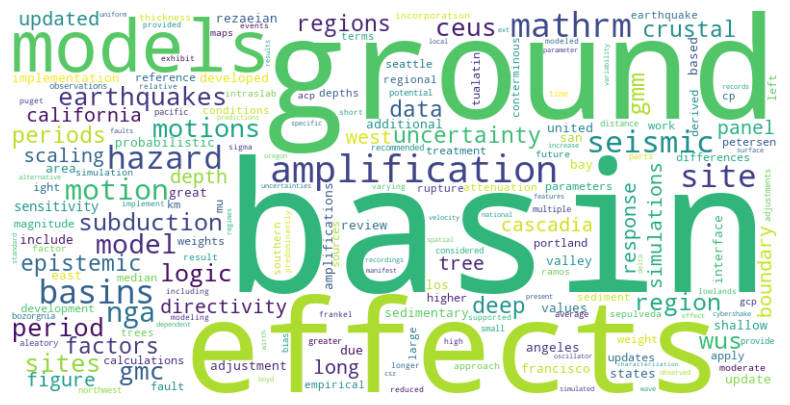

In [112]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Création du word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(freq)

# Affichage
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()